<a href="https://colab.research.google.com/github/byhaqii/Machine-Learning-2025/blob/main/JS07_TG01_2341720225_Muhammad_Rizal_Al_Baihaqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

## Langkah 1 - Install Library ANNOY

In [ ]:
# Install ANNOY
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551809 sha256=cfbcd81d78fc1ca6e7c1677189a306e5a6731f6dbdf7e69db3559bbbaccb5a97
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


## Langkah 2 - Import Library

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

## Langkah 3 - Membuat Dataset Dummy

In [ ]:
# Build Random Dataset and Query Point
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # random value at 100x100 space

# Query point (pick 1 random data point)
query = X[np.random.randint(0, n_points)]

## Langkah 4 - Exact NN

In [ ]:
# Compute Exact NN Using Brute Force
# It will visit the data one by one
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 11.867 ms


## Langkah 5 - Perhitungan Jarak dengan ANNOY

In [ ]:
# ANNOY 3 Tree
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # find 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1404 ms


## Langkah 6 - Visualisasi Hasil NN

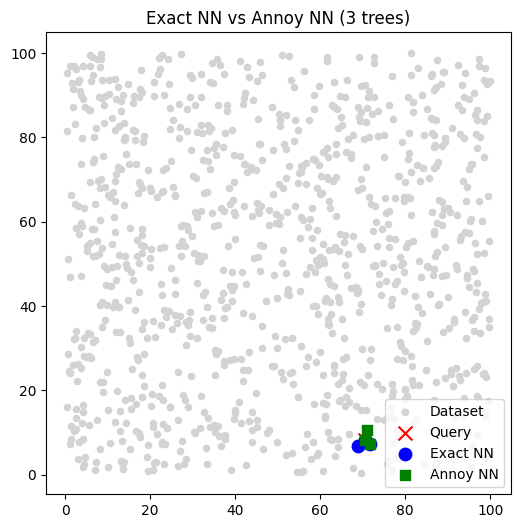

In [ ]:
# Visualize
# Knowing the NN produced by Exact NN and ANNOY
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

# Praktikum 2

## Langkah 1 - Install FAISS

In [ ]:
!pip install faiss-cpu
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 55.9 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu


## Langkah 2 - Import Library

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

## Langkah 3 - Membuat Dummy Dataset

In [ ]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point

## Langkah 4 - Buat Model Exact NN

In [ ]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

## Langkah 5 - Buat Model FAISS

In [ ]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

## Langkah 6 - Cek Hasil Performa

In [ ]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.0004036426544189453
Waktu IVF+PQ: 0.0001685619354248047


## Langkah 7 - Visualisasi

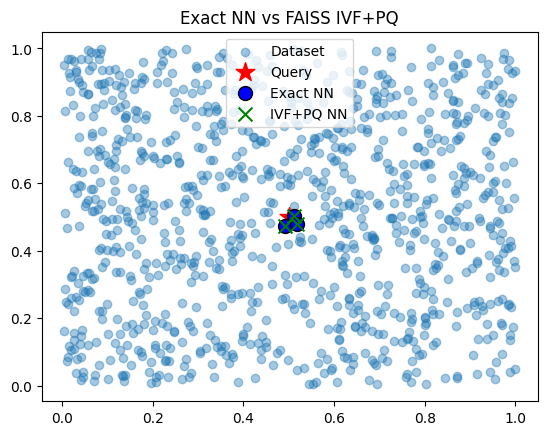

In [ ]:
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

# Praktikum 3

## Langkah 1 - Install Library

In [ ]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528140 sha256=7dcc1b4329f06395174083f90e8cfb2269f3626be5aefab6c5aafcb29fb33900
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


## Langkah 2 - Import Library

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

## Langkah 3 - Buat Dataset Dummy

In [ ]:
# Build Dummy Dataset
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

## Langkah 4 - Buat Model NN

In [ ]:
# Build NN Model
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

# Compute time performace
start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "s")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.04867696762084961 s


## Langkah 5 - Buat Model HNSW

In [ ]:
# Initiate Index
p = hnswlib.Index(space='l2', dim=dim)

# Define Max Elements
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Add Data
p.add_items(data)

# Set searching parameter
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "s")


=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.00017213821411132812 s


# Praktikum 4

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Build 1mio rows with 5D
# ===============================
n_data = 1_000_000   # try 100_000 if you have limited memory
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 32.6464364528656 detik
Query time: 0.0002560615539550781 detik
Neighbors: [129179, 559276, 630783, 213191, 559393] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.015116691589355469 detik
Query time: 0.006289005279541016 detik
Neighbors: [129179 559276 630783 213191 559393] ...

=== HNSW (hnswlib) ===
Build time: 166.77770328521729 detik
Query time: 0.0002505779266357422 detik
Neighbors: [129179 559276 630783 213191 559393] ...


# Praktikum 5

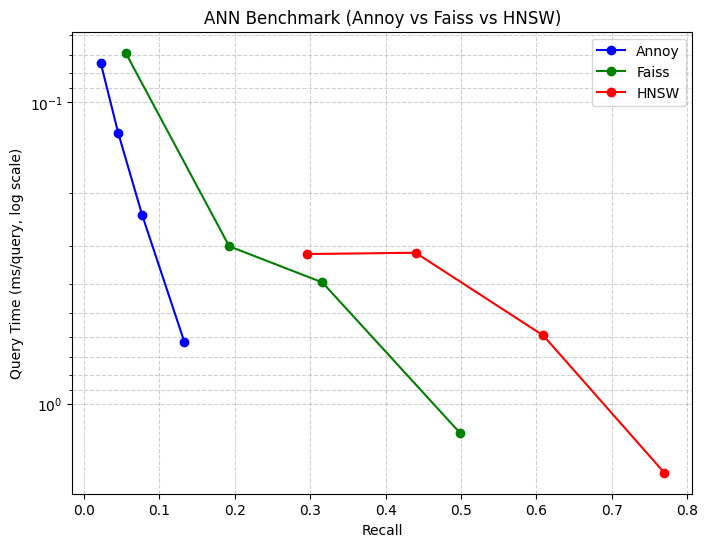

In [ ]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# Tugas 1

In [ ]:
# 1. Define Benchmark Configurations
configs = []
for n_data in [1000, 1_000_000]:
    for dim in [2, 5, 128]: # Added 128 as used in Praktikum 5
        for metric in ['euclidean', 'dot']: # Added dot (cosine) metric
            # Annoy supports 'angular', 'euclidean', 'manhattan', 'hamming', 'dot'
            # FAISS supports 'METRIC_L2', 'METRIC_INNER_PRODUCT' (cosine)
            # HNSWLIB supports 'l2', 'ip', 'cosine'

            if metric == 'dot': # Use 'inner_product' for FAISS and 'ip' for HNSWLIB
                faiss_metric = faiss.METRIC_INNER_PRODUCT
                hnsw_metric = 'ip'
            else: # Use 'euclidean' metric, 'l2' for FAISS and HNSWLIB
                faiss_metric = faiss.METRIC_L2
                hnsw_metric = 'l2'

            configs.append({
                'n_data': n_data,
                'dim': dim,
                'metric': metric,
                'faiss_metric': faiss_metric,
                'hnsw_metric': hnsw_metric
            })

print("Benchmark Configurations:")
for config in configs:
    print(config)

Benchmark Configurations:
{'n_data': 1000, 'dim': 2, 'metric': 'euclidean', 'faiss_metric': 1, 'hnsw_metric': 'l2'}
{'n_data': 1000, 'dim': 2, 'metric': 'dot', 'faiss_metric': 0, 'hnsw_metric': 'ip'}
{'n_data': 1000, 'dim': 5, 'metric': 'euclidean', 'faiss_metric': 1, 'hnsw_metric': 'l2'}
{'n_data': 1000, 'dim': 5, 'metric': 'dot', 'faiss_metric': 0, 'hnsw_metric': 'ip'}
{'n_data': 1000, 'dim': 128, 'metric': 'euclidean', 'faiss_metric': 1, 'hnsw_metric': 'l2'}
{'n_data': 1000, 'dim': 128, 'metric': 'dot', 'faiss_metric': 0, 'hnsw_metric': 'ip'}
{'n_data': 1000000, 'dim': 2, 'metric': 'euclidean', 'faiss_metric': 1, 'hnsw_metric': 'l2'}
{'n_data': 1000000, 'dim': 2, 'metric': 'dot', 'faiss_metric': 0, 'hnsw_metric': 'ip'}
{'n_data': 1000000, 'dim': 5, 'metric': 'euclidean', 'faiss_metric': 1, 'hnsw_metric': 'l2'}
{'n_data': 1000000, 'dim': 5, 'metric': 'dot', 'faiss_metric': 0, 'hnsw_metric': 'ip'}
{'n_data': 1000000, 'dim': 128, 'metric': 'euclidean', 'faiss_metric': 1, 'hnsw_metric':

In [ ]:
# 2. Implement Benchmarking Functions
def run_annoy_benchmark(n_data, dim, metric, k=10, n_trees=10, search_k=1000):
    print(f"Running Annoy benchmark for n_data={n_data}, dim={dim}, metric={metric}")
    X = np.random.random((n_data, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)

    # Build ground truth
    index_flat = faiss.IndexFlatL2(dim) # Use L2 for ground truth even for dot product, as distance is needed
    index_flat.add(X)
    _, gt_idx = index_flat.search(query, k)

    ann_index = AnnoyIndex(dim, metric)

    start = time.time()
    for i in range(n_data):
        ann_index.add_item(i, X[i])
    ann_index.build(n_trees)
    build_time = time.time() - start

    start = time.time()
    neighbors = ann_index.get_nns_by_vector(query[0], k, search_k=search_k, include_distances=False)
    query_time = time.time() - start

    # Annoy's get_nns_by_vector returns a list, convert to numpy array for recall calculation
    neighbors = np.array([neighbors])

    rec = recall_at_k(neighbors, gt_idx, k)

    return build_time, query_time, rec

def run_faiss_benchmark(n_data, dim, faiss_metric, k=10, nlist=100, nprobe=10):
    print(f"Running FAISS benchmark for n_data={n_data}, dim={dim}, metric={faiss_metric}")
    X = np.random.random((n_data, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)

    # Build ground truth
    index_flat = faiss.IndexFlatL2(dim) # Use L2 for ground truth even for dot product, as distance is needed
    index_flat.add(X)
    _, gt_idx = index_flat.search(query, k)


    quantizer = faiss.IndexFlatL2(dim) # quantizer always uses L2
    index = faiss.IndexIVFFlat(quantizer, dim, nlist, faiss_metric)

    start = time.time()
    index.train(X)
    index.add(X)
    build_time = time.time() - start

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(query, k)
    query_time = time.time() - start

    rec = recall_at_k(I, gt_idx, k)

    return build_time, query_time, rec

def run_hnsw_benchmark(n_data, dim, hnsw_metric, k=10, ef_construction=200, M=16, ef=50):
    print(f"Running HNSW benchmark for n_data={n_data}, dim={dim}, metric={hnsw_metric}")
    X = np.random.random((n_data, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)

    # Build ground truth
    index_flat = faiss.IndexFlatL2(dim) # Use L2 for ground truth even for dot product, as distance is needed
    index_flat.add(X)
    _, gt_idx = index_flat.search(query, k)

    p = hnswlib.Index(space=hnsw_metric, dim=dim)

    start = time.time()
    p.init_index(max_elements=n_data, ef_construction=ef_construction, M=M)
    p.add_items(X)
    build_time = time.time() - start

    p.set_ef(ef)
    start = time.time()
    labels, _ = p.knn_query(query, k=k)
    query_time = time.time() - start

    rec = recall_at_k(labels, gt_idx, k)

    return build_time, query_time, rec

# Reuse recall_at_k function from Praktikum 5
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

In [ ]:
# 3. Run Benchmarks
benchmark_results = []

for config in configs:
    n_data = config['n_data']
    dim = config['dim']
    metric = config['metric']
    faiss_metric = config['faiss_metric']
    hnsw_metric = config['hnsw_metric']

    # Annoy Benchmark
    try:
        annoy_build_time, annoy_query_time, annoy_recall = run_annoy_benchmark(n_data, dim, metric)
        benchmark_results.append({
            'Algorithm': 'Annoy',
            'n_data': n_data,
            'dim': dim,
            'metric': metric,
            'Build Time (s)': annoy_build_time,
            'Query Time (s)': annoy_query_time,
            'Recall@10': annoy_recall
        })
    except Exception as e:
        print(f"Error running Annoy benchmark for {config}: {e}")
        benchmark_results.append({
            'Algorithm': 'Annoy',
            'n_data': n_data,
            'dim': dim,
            'metric': metric,
            'Build Time (s)': 'Error',
            'Query Time (s)': 'Error',
            'Recall@10': 'Error'
        })


    # FAISS Benchmark
    try:
        # FAISS IVF requires training, which might be slow for large datasets.
        # For simplicity in this benchmark, we are using IndexIVFFlat.
        # For very large datasets, more advanced FAISS indices like IndexIVFPQ would be used.
        faiss_build_time, faiss_query_time, faiss_recall = run_faiss_benchmark(n_data, dim, faiss_metric)
        benchmark_results.append({
            'Algorithm': 'FAISS',
            'n_data': n_data,
            'dim': dim,
            'metric': metric,
            'Build Time (s)': faiss_build_time,
            'Query Time (s)': faiss_query_time,
            'Recall@10': faiss_recall
        })
    except Exception as e:
        print(f"Error running FAISS benchmark for {config}: {e}")
        benchmark_results.append({
            'Algorithm': 'FAISS',
            'n_data': n_data,
            'dim': dim,
            'metric': metric,
            'Build Time (s)': 'Error',
            'Query Time (s)': 'Error',
            'Recall@10': 'Error'
        })

    # HNSW Benchmark
    try:
        hnsw_build_time, hnsw_query_time, hnsw_recall = run_hnsw_benchmark(n_data, dim, hnsw_metric)
        benchmark_results.append({
            'Algorithm': 'HNSW',
            'n_data': n_data,
            'dim': dim,
            'metric': metric,
            'Build Time (s)': hnsw_build_time,
            'Query Time (s)': hnsw_query_time,
            'Recall@10': hnsw_recall
        })
    except Exception as e:
        print(f"Error running HNSW benchmark for {config}: {e}")
        benchmark_results.append({
            'Algorithm': 'HNSW',
            'n_data': n_data,
            'dim': dim,
            'metric': metric,
            'Build Time (s)': 'Error',
            'Query Time (s)': 'Error',
            'Recall@10': 'Error'
        })

Running Annoy benchmark for n_data=1000, dim=2, metric=euclidean
Running FAISS benchmark for n_data=1000, dim=2, metric=1
Running HNSW benchmark for n_data=1000, dim=2, metric=l2
Running Annoy benchmark for n_data=1000, dim=2, metric=dot
Running FAISS benchmark for n_data=1000, dim=2, metric=0
Running HNSW benchmark for n_data=1000, dim=2, metric=ip
Running Annoy benchmark for n_data=1000, dim=5, metric=euclidean
Running FAISS benchmark for n_data=1000, dim=5, metric=1
Running HNSW benchmark for n_data=1000, dim=5, metric=l2
Running Annoy benchmark for n_data=1000, dim=5, metric=dot
Running FAISS benchmark for n_data=1000, dim=5, metric=0
Running HNSW benchmark for n_data=1000, dim=5, metric=ip
Running Annoy benchmark for n_data=1000, dim=128, metric=euclidean
Running FAISS benchmark for n_data=1000, dim=128, metric=1
Running HNSW benchmark for n_data=1000, dim=128, metric=l2
Running Annoy benchmark for n_data=1000, dim=128, metric=dot
Running FAISS benchmark for n_data=1000, dim=128, 

In [ ]:
# 4. Organize and Present Results
import pandas as pd

results_df = pd.DataFrame(benchmark_results)

In [ ]:
# 5. Display Results Table
display(results_df)

,Algorithm,n_data,dim,metric,Build Time (s),Query Time (s),Recall@10
0,Annoy,1000,2,euclidean,0.024756,0.000207,1.0
1,FAISS,1000,2,euclidean,0.003324,0.000267,1.0
2,HNSW,1000,2,euclidean,0.053344,0.000235,1.0
3,Annoy,1000,2,dot,0.059576,0.000266,0.0
4,FAISS,1000,2,dot,0.011502,0.000063,0.0
5,HNSW,1000,2,dot,0.034524,0.000064,0.0
6,Annoy,1000,5,euclidean,0.017320,0.000215,1.0
7,FAISS,1000,5,euclidean,0.001933,0.000060,1.0
8,HNSW,1000,5,euclidean,0.059572,0.000075,1.0
9,Annoy,1000,5,dot,0.034661,0.000222,0.0


# Tugas 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# jalankan sekali saja
!pip install --upgrade pip
!pip install faiss-cpu hnswlib annoy kaggle pandas scikit-learn tqdm matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 14.6 MB/s  0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 44.8 MB/s  0:00:00
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528147 sha256=311a98e923bc41697a41bb228e77a8a0093d57e7203b07fdd706230bca2bf787
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
  DEPRECATION: Building 'annoy' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A poss

In [4]:
import glob
import pandas as pd
csv_path = '/content/drive/MyDrive/images/songs_with_attributes_and_lyrics.csv'

print("Using:", csv_path)

# Load
df = pd.read_csv(csv_path, low_memory=False, sep=',', on_bad_lines='skip')
print("Data shape:", df.shape)
df.head()

Using: /content/drive/MyDrive/images/songs_with_attributes_and_lyrics.csv
Data shape: (955320, 17)


,id,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,['HELLYEAH'],0.415,0.6050,7,-11.157,1,0.0575,0.00116,0.838000,0.4710,0.193,100.059,79500.0,"He said he came from Jamaica,\n he owned a cou..."
1,2ASl4wirkeYm3OWZxXKYuq,!!,NaN,Yxngxr1,0.788,0.6480,7,-9.135,0,0.3150,0.90000,0.000000,0.1760,0.287,79.998,114000.0,"Fucked a bitch, now she running with my kids\n..."
2,69lcggVPmOr9cvPx9kLiiN,!!! - Interlude,Where I Belong EP,['Glowie'],0.000,0.0354,7,-20.151,0,0.0000,0.90800,0.000000,0.4790,0.000,0.000,11413.0,"Oh, my God, I'm going crazy\n"
3,4U7dlZjg1s9pjdppqZy0fm,!!De Repente!!,Un Palo Al Agua (20 Grandes Canciones),['Rosendo'],0.657,0.8820,5,-6.340,1,0.0385,0.00740,0.000013,0.0474,0.939,123.588,198173.0,Continuamente se extraña la gente si no puede ...
4,4v1IBp3Y3rpkWmWzIlkYju,!!De Repente!!,Fuera De Lugar,['Rosendo'],0.659,0.8930,5,-8.531,1,0.0411,0.09220,0.000019,0.0534,0.951,123.600,199827.0,Continuamente se extraña la gente si no puede ...


In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Optional: exclude ID / index-like columns yang sering ada
exclude = ['id','track_id','uri','Unnamed: 0']
numeric_cols = [c for c in numeric_cols if c not in exclude]

print(f"Found {len(numeric_cols)} numeric columns. Sample columns:", numeric_cols[:30])

# Buat matriks fitur, drop NA untuk keseragaman
X_df = df[numeric_cols].dropna().reset_index(drop=True)
X = X_df.values.astype('float32')

print("Before scaling:", X.shape)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("After scaling:", X_scaled.shape)

Found 10 numeric columns. Sample columns: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Before scaling: (955320, 10)
After scaling: (955320, 10)


In [7]:
# Ganti N_sample sesuai resource; kalau mau full ubah ke big number atau set ke None
N_sample = 100000   # contoh: 100k
if N_sample is None or N_sample >= X_scaled.shape[0]:
    X_scaled_small = X_scaled
    df_small = X_df
else:
    idx = np.random.choice(X_scaled.shape[0], size=min(N_sample, X_scaled.shape[0]), replace=False)
    X_scaled_small = X_scaled[idx]
    df_small = X_df.iloc[idx].reset_index(drop=True)

print("Using subset shape:", X_scaled_small.shape)

Using subset shape: (100000, 10)


In [8]:
import random
k = 10  # jumlah neighbours yang dicari
q_idx = random.randint(0, X_scaled_small.shape[0]-1)
query = X_scaled_small[q_idx].reshape(1, -1)
print("Query index in subset:", q_idx)

# cari kolom nama track/artis bila ada
name_col = None
for c in ['track_name','name','title','song','track','track_title']:
    if c in df_small.columns:
        name_col = c
        break

if name_col:
    print("Query track name:", df_small.loc[q_idx, name_col])
else:
    print("No name/title column found in subset. (That's OK)")

Query index in subset: 87436
No name/title column found in subset. (That's OK)


In [9]:
from sklearn.neighbors import NearestNeighbors
import time
import numpy as np

t0 = time.time()
nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='brute')  # exact
nn.fit(X_scaled_small)
dist_exact, idx_exact = nn.kneighbors(query)
t_exact = time.time() - t0

print("Exact NN — time (s):", round(t_exact,4))
print("Exact indices:", idx_exact[0].tolist())

Exact NN — time (s): 0.0847
Exact indices: [87436, 17969, 68674, 97631, 56129, 43279, 58837, 37032, 7533, 27464]


In [12]:
from annoy import AnnoyIndex
from tqdm import tqdm
import time

n_dim = X_scaled_small.shape[1]
n_trees = 40   # trade-off: lebih besar -> lebih akurat tapi build lebih lama

ann = AnnoyIndex(n_dim, 'euclidean')
t0 = time.time()
for i, v in enumerate(tqdm(X_scaled_small, desc="Adding to ANNOY")):
    ann.add_item(i, v.tolist())
ann.build(n_trees)
t_build_ann = time.time() - t0

tq0 = time.time()
idx_annoy, dist_annoy = ann.get_nns_by_vector(query[0], k, include_distances=True)
t_query_ann = time.time() - tq0

print(f"ANNOY build+query time (s): {round(t_build_ann + t_query_ann,4)} (build {round(t_build_ann,4)}, query {round(t_query_ann,4)})")
print("ANNOY indices:", idx_annoy)

Adding to ANNOY: 100%|██████████| 100000/100000 [00:00<00:00, 767157.64it/s]


ANNOY build+query time (s): 4.9378 (build 4.9374, query 0.0004)
ANNOY indices: [87436, 17969, 68674, 97631, 56129, 43279, 58837, 37032, 7533, 27464]


In [13]:
import faiss
import time
import numpy as np

xb = X_scaled_small.astype('float32')
n_dim = xb.shape[1]

# Jika dataset besar, coba IndexIVFFlat (approx). Kalau gagal fallback ke IndexFlatL2.
use_ivf = xb.shape[0] >= 2000  # syarat sederhana untuk pakai ivf

try:
    if use_ivf:
        # nlist = many centroids (tune), tapi jangan lebih besar dari jumlah data
        nlist = min(1024, max(16, xb.shape[0] // 100))
        quantizer = faiss.IndexFlatL2(n_dim)
        index_faiss = faiss.IndexIVFFlat(quantizer, n_dim, nlist, faiss.METRIC_L2)
        # perlu train
        train_n = min(100000, xb.shape[0])
        print("Training FAISS IVF on", train_n, "vectors (nlist=", nlist, ")")
        index_faiss.train(xb[:train_n])
        index_faiss.add(xb)
        index_faiss.nprobe = 16
    else:
        index_faiss = faiss.IndexFlatL2(n_dim)
        index_faiss.add(xb)

    t0 = time.time()
    D_faiss, idx_faiss = index_faiss.search(query.astype('float32'), k)
    t_faiss = time.time() - t0
    print("FAISS search time (s):", round(t_faiss,4))
    print("FAISS indices:", idx_faiss[0].tolist())
except Exception as e:
    print("FAISS build/search failed:", e)
    # fallback ke exact flat
    index_faiss = faiss.IndexFlatL2(n_dim)
    index_faiss.add(xb)
    t0 = time.time()
    D_faiss, idx_faiss = index_faiss.search(query.astype('float32'), k)
    t_faiss = time.time() - t0
    print("FAISS fallback (Flat) indices:", idx_faiss[0].tolist())

Training FAISS IVF on 100000 vectors (nlist= 1000 )
FAISS search time (s): 0.0002
FAISS indices: [87436, 17969, 68674, 97631, 56129, 43279, 58837, 37032, 7533, 27464]


In [14]:
import hnswlib
import time
import numpy as np

p = hnswlib.Index(space='l2', dim=n_dim)
max_elements = X_scaled_small.shape[0]
p.init_index(max_elements=max_elements, ef_construction=200, M=16)
t0 = time.time()
p.add_items(X_scaled_small, np.arange(max_elements))
p.set_ef(50)  # ef untuk query — tambah untuk akurasi
t_build_hnsw = time.time() - t0

tq0 = time.time()
labels_hnsw, distances_hnsw = p.knn_query(query, k=k)
t_query_hnsw = time.time() - tq0

print(f"HNSW build+query time (s): {round(t_build_hnsw + t_query_hnsw,4)} (build {round(t_build_hnsw,4)}, query {round(t_query_hnsw,4)})")
print("HNSW indices:", labels_hnsw[0].tolist())

HNSW build+query time (s): 17.7565 (build 17.7562, query 0.0004)
HNSW indices: [87436, 17969, 68674, 97631, 56129, 43279, 58837, 37032, 7533, 27464]


               Algorithm  Measured_time_s  Overlap_with_Exact
0     Exact NN (sklearn)           0.0847                 1.0
1    ANNOY (build+query)           4.9378                 1.0
2         FAISS (search)           0.0002                 1.0
3  HNSWLIB (build+query)          17.7565                 1.0

Exact NN neighbors (top k):
     idx
0  87436
1  17969
2  68674
3  97631
4  56129
5  43279
6  58837
7  37032
8   7533
9  27464

ANNOY neighbors (top k):
     idx
0  87436
1  17969
2  68674
3  97631
4  56129
5  43279
6  58837
7  37032
8   7533
9  27464

FAISS neighbors (top k):
     idx
0  87436
1  17969
2  68674
3  97631
4  56129
5  43279
6  58837
7  37032
8   7533
9  27464

HNSW neighbors (top k):
     idx
0  87436
1  17969
2  68674
3  97631
4  56129
5  43279
6  58837
7  37032
8   7533
9  27464


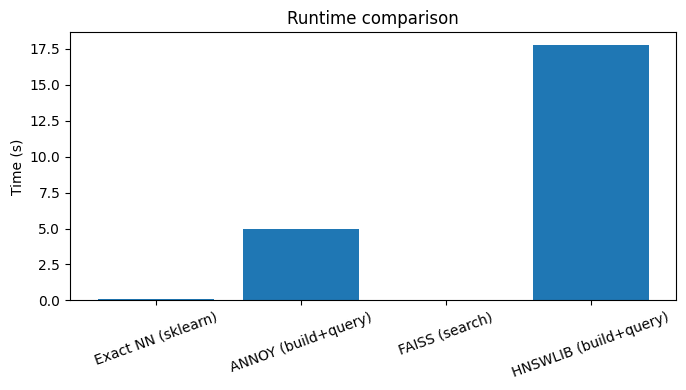

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert indices to lists
exact_list = idx_exact[0].tolist()
annoy_list = idx_annoy if isinstance(idx_annoy, list) else list(idx_annoy)
faiss_list = idx_faiss[0].tolist()
hnsw_list = labels_hnsw[0].tolist()

def overlap(a,b):
    return len(set(a) & set(b)) / len(a)

results = pd.DataFrame({
    "Algorithm": ["Exact NN (sklearn)", "ANNOY (build+query)", "FAISS (search)", "HNSWLIB (build+query)"],
    "Measured_time_s": [
        round(t_exact,4),
        round((t_build_ann + t_query_ann),4),
        round(t_faiss,4),
        round((t_build_hnsw + t_query_hnsw),4)
    ],
    "Overlap_with_Exact": [
        1.0,
        round(overlap(exact_list, annoy_list),4),
        round(overlap(exact_list, faiss_list),4),
        round(overlap(exact_list, hnsw_list),4)
    ]
})

print(results)

# Tampilkan top-k neighbor dengan nama track (jika ada name_col)
def idx_to_info(idx_list, df_context, name_col):
    rows = []
    for ii in idx_list:
        info = {"idx": int(ii)}
        if name_col:
            info["name"] = df_context.loc[ii, name_col]
        rows.append(info)
    return pd.DataFrame(rows)

print("\nExact NN neighbors (top k):")
print(idx_to_info(exact_list, df_small.reset_index(drop=True), name_col))

print("\nANNOY neighbors (top k):")
print(idx_to_info(annoy_list, df_small.reset_index(drop=True), name_col))

print("\nFAISS neighbors (top k):")
print(idx_to_info(faiss_list, df_small.reset_index(drop=True), name_col))

print("\nHNSW neighbors (top k):")
print(idx_to_info(hnsw_list, df_small.reset_index(drop=True), name_col))

# Plot runtime chart
plt.figure(figsize=(7,4))
plt.bar(results['Algorithm'], results['Measured_time_s'])
plt.ylabel('Time (s)')
plt.title('Runtime comparison')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Saved summary CSV to: /content/drive/MyDrive/spotify_ann_results.csv
Saved runtime plot to: /content/drive/MyDrive/spotify_ann_runtime.png
Saved neighbor detail CSV to: /content/drive/MyDrive/spotify_ann_neighbors_detail.csv


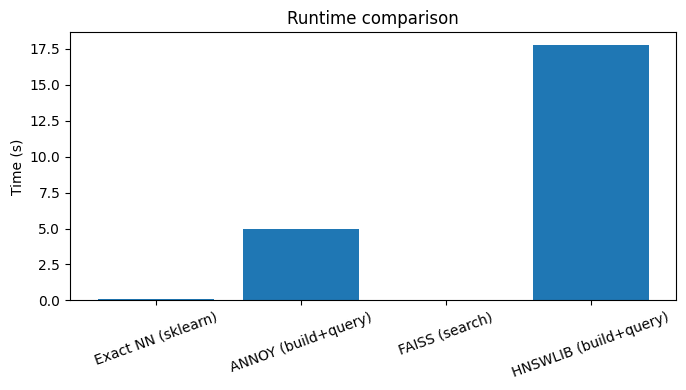

In [16]:
# simpan results summary
out_csv = "/content/drive/MyDrive/spotify_ann_results.csv"
results.to_csv(out_csv, index=False)
print("Saved summary CSV to:", out_csv)

# simpan plot
out_png = "/content/drive/MyDrive/spotify_ann_runtime.png"
plt.figure(figsize=(7,4))
plt.bar(results['Algorithm'], results['Measured_time_s'])
plt.ylabel('Time (s)')
plt.title('Runtime comparison')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig(out_png)
print("Saved runtime plot to:", out_png)

# Simpan full neighbor lists detail (opsional)
neighbors_detail = {
    "exact": exact_list,
    "annoy": annoy_list,
    "faiss": faiss_list,
    "hnsw": hnsw_list
}
out_neighbors = "/content/drive/MyDrive/spotify_ann_neighbors_detail.csv"
# build DataFrame with top-k columns
maxk = max(len(v) for v in neighbors_detail.values())
csv_df = pd.DataFrame({
    alg: (neighbors_detail[alg] + [None]*(maxk - len(neighbors_detail[alg]))) for alg in neighbors_detail
})
csv_df.to_csv(out_neighbors, index=False)
print("Saved neighbor detail CSV to:", out_neighbors)